In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
data=pd.read_csv("card_transaction_fraud.csv")

In [4]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [10]:
correlation=data.corr()
correlation

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


In [9]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1dbf41e2bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dbf49cbe10>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1dbf49c9b90>],
 'medians': [<matplotlib.lines.Line2D at 0x1dbf4a0cdd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dbf4a0d710>],
 'means': []}

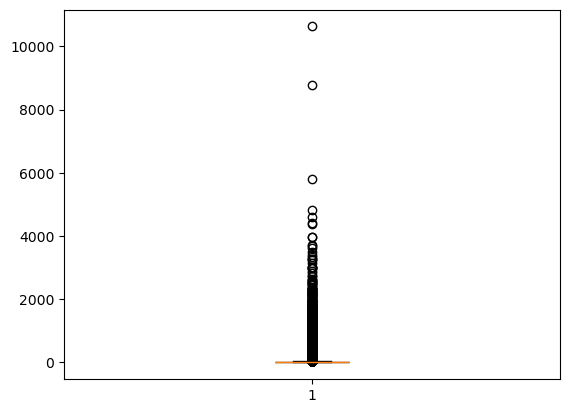

In [11]:
plt.boxplot(data["distance_from_home"],patch_artist=True)

In [12]:
print(f"old shape of data: {data.shape}")
Q1=data["distance_from_home"].quantile(0.25)
Q3=data["distance_from_home"].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["distance_from_home"]<=lower)[0]
upper_index=np.where(data["distance_from_home"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data:{data.shape}")

old shape of data: (1000000, 8)
new shape of data:(896369, 8)


In [13]:
data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dbee012390>,
 'caps': [<matplotlib.lines.Line2D at 0x1dbf577b490>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1dbf4a21f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1dbf5788610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dbf5788f50>],
 'means': []}

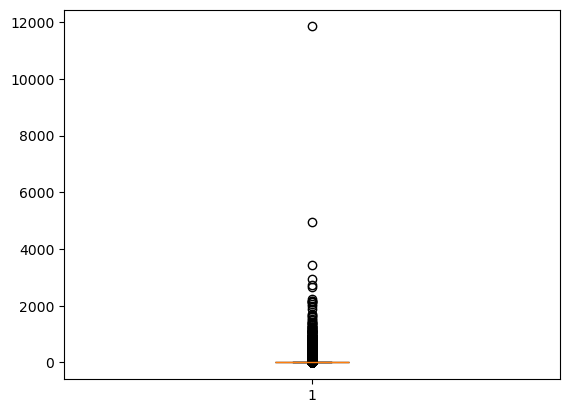

In [14]:
plt.boxplot(data["distance_from_last_transaction"],patch_artist=True)

In [15]:
print(f"old shape of data: {data.shape}")
Q1=data["distance_from_last_transaction"].quantile(0.25)
Q3=data["distance_from_last_transaction"].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["distance_from_last_transaction"]<=lower)[0]
upper_index=np.where(data["distance_from_last_transaction"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data: {data.shape}")

old shape of data: (896369, 8)
new shape of data: (784936, 8)


In [17]:
data.reset_index(inplace=True)
data.drop("index",inplace=True,axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dbf4a27250>,
 'caps': [<matplotlib.lines.Line2D at 0x1dbf57f1610>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1dbf57efb50>],
 'medians': [<matplotlib.lines.Line2D at 0x1dbf57f2b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dbf57f3650>],
 'means': []}

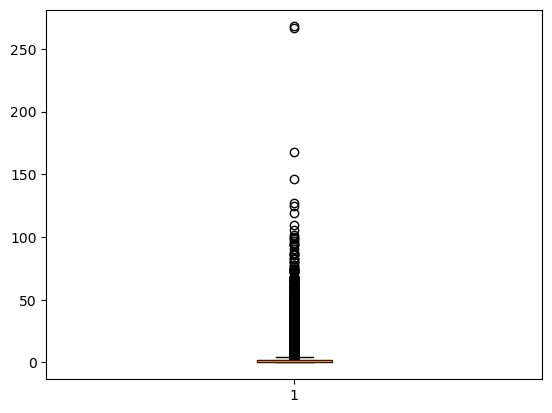

In [18]:
plt.boxplot(data["ratio_to_median_purchase_price"],patch_artist=True)

In [19]:
print(f"old shape of data: {data.shape}")
Q1=data["ratio_to_median_purchase_price"].quantile(0.25)
Q3=data["ratio_to_median_purchase_price"].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["ratio_to_median_purchase_price"]<=lower)[0]
upper_index=np.where(data["ratio_to_median_purchase_price"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data: {data.shape}")

old shape of data: (784936, 8)
new shape of data: (718686, 8)


{'whiskers': [<matplotlib.lines.Line2D at 0x1dbf5ec5550>,
 'caps': [<matplotlib.lines.Line2D at 0x1dbf5ec6610>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1dbf57d9ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dbf5ec7610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dbf5ec7d10>],
 'means': []}

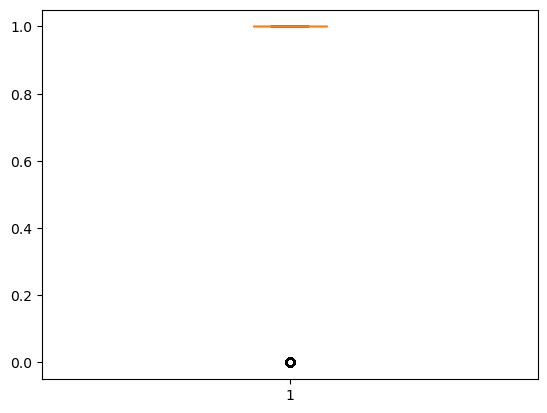

In [20]:
plt.boxplot(data["repeat_retailer"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dbf5efbcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dbf5f12990>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1dbf4a1c150>],
 'medians': [<matplotlib.lines.Line2D at 0x1dbf5f13a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dbf5f28250>],
 'means': []}

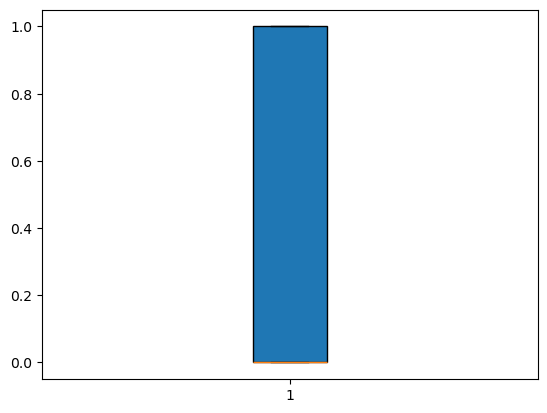

In [21]:
plt.boxplot(data["used_chip"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dbf5f6d010>,
 'caps': [<matplotlib.lines.Line2D at 0x1dbf5f7df90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1dbf5f7c550>],
 'medians': [<matplotlib.lines.Line2D at 0x1dbf5f7f010>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dbf5f7f890>],
 'means': []}

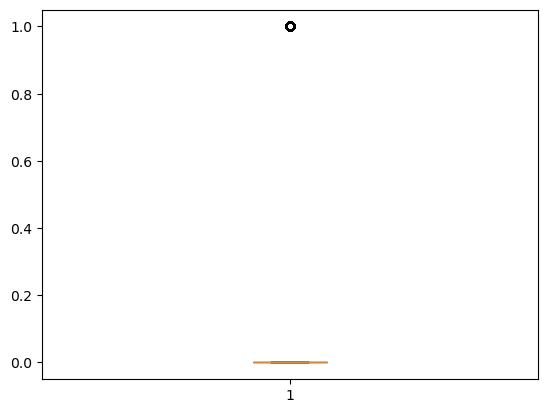

In [22]:
plt.boxplot(data["used_pin_number"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dbfa98c790>,
 'caps': [<matplotlib.lines.Line2D at 0x1dbfa98db50>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1dbfa97b890>],
 'medians': [<matplotlib.lines.Line2D at 0x1dbfa98ea50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dbfa98f250>],
 'means': []}

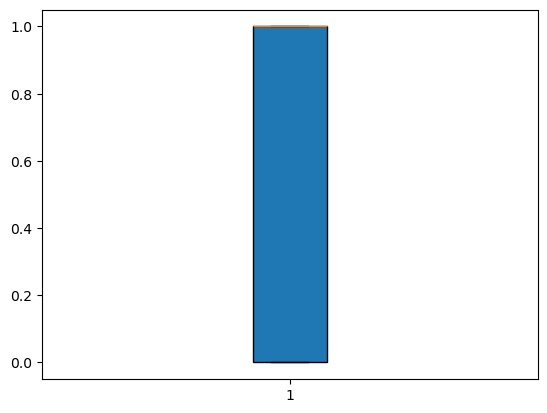

In [23]:
plt.boxplot(data["online_order"],patch_artist=True)

In [24]:
x=data.drop("fraud",axis=1)
y=data["fraud"]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [26]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
model.score(x_train,y_train)

0.9987407556857316

In [28]:
model.score(x_test,y_test)

0.9988242496764947

In [29]:
y_pred=model.predict(x_test)

In [32]:
pd.DataFrame({"TrueValues":y_test,"Predcited Values":y_pred})

,TrueValues,Predcited Values
449397,0.0,0.0
722068,0.0,0.0
584279,0.0,0.0
524469,0.0,0.0
760243,0.0,0.0
...,...,...
292649,0.0,0.0
600810,0.0,0.0
691486,0.0,0.0
290250,0.0,0.0


In [33]:
accuracy_score(y_test,y_pred)

0.9988242496764947

In [34]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[141924,     59],
       [   110,   1645]], dtype=int64)

Text(50.722222222222214, 0.5, 'TrueValues')

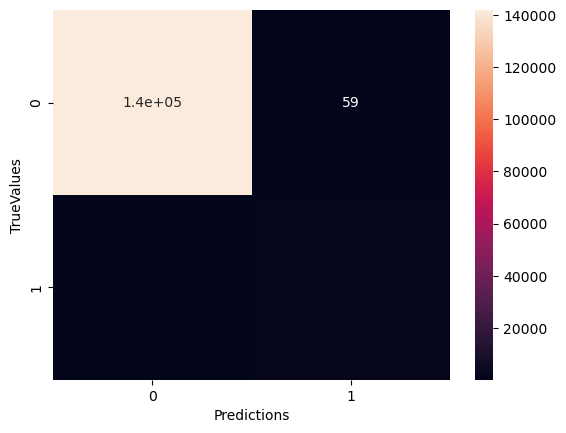

In [35]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("TrueValues")

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    141983
         1.0       0.97      0.94      0.95      1755

    accuracy                           1.00    143738
   macro avg       0.98      0.97      0.98    143738
weighted avg       1.00      1.00      1.00    143738

